#### Telecom Churn - Case Study

### Problem Statement:

-  Predict churn only on high-value customers
-  Predict usage-based definition to define churn
-  This project is based on the Indian and Southeast Asian market
-  Churn Phases
    -  In ‘good’ phase the customer is happy with the service and behaves as usual
    -  In ‘action’ phase The customer experience starts to sore in this phase
    -  In ‘churn’ phase the customer is said to have churned

### Step 1: Reading and Understanding the Data

In [1]:
# lets import the required libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Setting the columns that can be displayed to max as 500 and rows to 300
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 300)

In [2]:
# lets import the dataset
telecom = pd.read_csv("../telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# lets check the dimensions of the dataset
telecom.shape
print("There are total %d columns." %telecom.shape[1])
print("There are total %d observations." %telecom.shape[0])

There are total 226 columns.
There are total 99999 observations.


In [4]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Step 2 : Data Cleansing

Lets separate our diff datatype columns inorder to perform better clearning and missing value treatment

In [6]:
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_vars =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9']

num_vars = [column for column in telecom.columns if column not in id_cols + date_cols + cat_vars]

In [7]:
#print("ID cols: %d\nDate cols:%d\nNumeric cols:%d\nCategory cols:%d" % (len(id_cols), len(date_cols), len(num_vars), len(cat_vars)))

#check if we have missed any column or not
#print(len(id_cols) + len(date_cols) + len(num_vars) + len(cat_vars) == telecom.shape[1])

In [8]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)


count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

### Columns with meaningful missing values 

#### Immuting with zero 
For the below columns if values are missing that means no recharge done . Thus we can immute these missing values in these columns with 0.

In [9]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
        'max_rech_data_6','max_rech_data_7','max_rech_data_8']

telecom[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000
mean,2.463802,2.666419,2.651999,2.441170,192.600982,200.981292,197.526489,192.734315,126.393392,126.729459,125.717301,124.94144,126.393392,126.729459,125.717301
std,2.789128,3.031593,3.074987,2.516339,192.646318,196.791224,191.301305,188.400286,108.477235,109.765267,109.437851,111.36376,108.477235,109.765267,109.437851
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,82.000000,92.000000,87.000000,69.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,1.000000,1.000000,1.000000,2.000000,154.000000,154.000000,154.000000,164.000000,145.000000,145.000000,145.000000,145.00000,145.000000,145.000000,145.000000
75%,3.000000,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000,252.000000,177.000000,177.000000,179.000000,179.00000,177.000000,177.000000,179.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.00000,1555.000000,1555.000000,1555.000000


In [10]:
# impute missing values with 0
telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

In [11]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)


fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
count_rech_3g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_7    74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
night_pck_user_7            74.43
arpu_3g_7                   74.43
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
count_rech_3g_9             74.08
arpu_3g_8                   73.66
arpu_2g_8                   73.66
date_of_last_rech_data_8    73.66
count_rech_3g_8             73.66
fb_user_8                   73.66
night_pck_user_8            73.66
count_rech_2g_8             73.66
std_ic_t2o_mou_9             7.75
roam_og_mou_9 

#### Replace NaN values in categorical variables with -1

We will replace missing values in the categorical variables i.e.
1. night_pck : Scheme to use during specific night hours only
2. FB_USER : Service scheme to avail services of Facebook and similar social networking sites

values with '-1' where '-1' will be a new category. 

In [12]:
# replace missing values with '-1' in categorical columns
telecom[cat_vars] = telecom[cat_vars].apply(lambda x: x.fillna(-1))

In [13]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)

arpu_3g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
arpu_2g_9                   74.08
arpu_3g_9                   74.08
count_rech_3g_9             74.08
count_rech_3g_8             73.66
arpu_2g_8                   73.66
arpu_3g_8                   73.66
date_of_last_rech_data_8    73.66
count_rech_2g_8             73.66
loc_og_t2m_mou_9             7.75
std_ic_t2f_mou_9             7.75
loc_og_t2c_mou_9             7.75
loc_og_t2f_mou_9             7.75
isd_ic_mou_9                 7.75
std_og_mou_9                 7.75
std_ic_t2o_mou_9             7.75
std_ic_mou_9                 7.75
std_og_t2c_mou_9             7.75
std_ic_t2t_mou

### Dropping columns with high null value % 

In [14]:
cols = list(telecom.apply(lambda column: True if column.isnull().sum()/telecom.shape[0] < 0.7 else False))
telecom = telecom.loc[:,cols]

In [15]:
telecom.shape

(99999, 206)

### Dropping values with zero variance 

i.e. having only one value which will be of no significance in model building and prediction

In [16]:
col_list = telecom.loc[:,telecom.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Remove Columns with only 1 unique value
telecom = telecom.loc[:,telecom.apply(pd.Series.nunique) != 1]
telecom.shape

(99999, 190)

In [18]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)


std_og_mou_9           7.75
loc_og_t2m_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_ic_t2f_mou_9       7.75
loc_og_t2t_mou_9       7.75
std_og_t2t_mou_9       7.75
spl_ic_mou_9           7.75
roam_og_mou_9          7.75
loc_og_mou_9           7.75
loc_ic_t2m_mou_9       7.75
loc_og_t2c_mou_9       7.75
roam_ic_mou_9          7.75
std_og_t2m_mou_9       7.75
og_others_9            7.75
loc_ic_mou_9           7.75
offnet_mou_9           7.75
spl_og_mou_9           7.75
isd_og_mou_9           7.75
onnet_mou_9            7.75
loc_og_t2f_mou_9       7.75
std_og_t2f_mou_9       7.75
std_ic_mou_9           7.75
loc_ic_t2t_mou_9       7.75
isd_ic_mou_9           7.75
std_ic_t2t_mou_9       7.75
loc_ic_t2f_mou_9       7.75
ic_others_9            7.75
loc_og_mou_8           5.38
ic_others_8            5.38
std_og_t2m_mou_8       5.38
spl_og_mou_8           5.38
loc_ic_mou_8           5.38
std_og_t2f_mou_8       5.38
std_ic_t2t_mou_8       5.38
isd_og_mou_8           5.38
std_og_mou_8        

#### Dropping the date columns as it is of no use for analysis

In [19]:
telecom.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis = 1,inplace = True)        


In [20]:
telecom.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2

#### Dropping the id columns as it is of no use for analysis

In [21]:
telecom.drop('mobile_number',axis = 1,inplace = True)        

* Lets first extract the high value customers before we perform anyother operations on data due to it's huge volume.
* High value customers will take lesser time in computation as compare to whole data.
* **Filter high-value customers**:As mentioned, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).pip install fancyimpute

### Filter High Value Customers

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.


####  Derived feature  - Total data recharge amount 

*  first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8)
*  second column is total_rech_data_x (x represnts month here, would be either 6 or 7 or 8)

We will introduce a new column total_rech_data_amt_x which can be calculated as av_rech_amt_data_x * total_rech_data_x

In [22]:
telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']

In [23]:
# now we dont need columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8) , lets drop them
telecom.drop(['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7','total_rech_data_8','av_rech_amt_data_8'],axis = 1,inplace = True)

 #### Derived Feature - recharge amount (total data recharge + total recharge)

In [24]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom['rech_amt_6'] = telecom.total_rech_amt_6 + telecom.total_rech_data_amt_6
telecom['rech_amt_7'] = telecom.total_rech_amt_7 + telecom.total_rech_data_amt_7
telecom['rech_amt_8'] = telecom.total_rech_amt_8 + telecom.total_rech_data_amt_8


In [25]:
# calculate average recharge done by customer in June and July
telecom['rech_amt_6n7'] = (telecom['rech_amt_6']  + telecom['rech_amt_7'])/2

In [26]:
# look at the 70th percentile recharge amount

pertile = np.percentile(telecom['rech_amt_6n7'], 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pertile)


70 percentile of 6th and 7th months avg recharge amount:  478.0


#### Filter High Value Customer

In [27]:
high_val_cust = telecom[telecom['rech_amt_6n7'] >= pertile]
print('Dataframe Shape after Filtering HIgh Value Customers: ', high_val_cust.shape)


Dataframe Shape after Filtering HIgh Value Customers:  (30001, 186)


**So now we have our high value customers data. And we will predict churn only on high-value customers.**

### Immuting the missing values using FancyImpute

In [28]:
#!pip install fancyimpute

In [29]:
high_val_cust_cols = high_val_cust.columns

# using MICE technique to impute missing values in the rest of the columns
from fancyimpute import IterativeImputer as MICE
imputed = MICE().fit_transform(high_val_cust)

In [30]:
# convert imputed numpy array to pandas dataframe
high_val_cust = pd.DataFrame(imputed, columns=high_val_cust_cols)
print(high_val_cust.isnull().sum()*100/high_val_cust.shape[0])

arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
onnet_mou_9              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
offnet_mou_9             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_ic_mou_9            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
roam_og_mou_9            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2t_mou_9         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2m_mou_9         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2f_mou_9         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou

### Derive churn Column ( Target Variable)

**Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In [31]:
# calculate total incoming and outgoing calls 
high_val_cust['total_calls_9'] = high_val_cust.total_ic_mou_9 + high_val_cust.total_og_mou_9

In [32]:
# calculate 2g and 3g data consumption
high_val_cust['total_internet_mb_9'] =  high_val_cust.vol_2g_mb_9 + high_val_cust.vol_3g_mb_9

#### Derived feature  - Churn

In [33]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn

high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.total_calls_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [34]:
high_val_cust = high_val_cust.drop(['total_calls_9', 'total_internet_mb_9'], axis=1)

In [35]:
# change data type to category
high_val_cust .churn = high_val_cust .churn.astype("category")

In [36]:
# lets find out churn/non churn percentage

print(high_val_cust.churn.value_counts()*100/high_val_cust.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64


**91% of the customers do not churn, this might be a case of class imbalance, we will treat it later**

#### Deleting columns that belong to the churn month (9th month) 

In [37]:
# delete all variables relating to 9th month
high_val_cust = high_val_cust.filter(regex='[^9]$', axis=1)
high_val_cust.shape

(30001, 142)

#### Derived features - average  of 6th & 7th months

In [38]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months

high_val_cust['arpu_diff'] = high_val_cust.arpu_8 - ((high_val_cust.arpu_6 + high_val_cust.arpu_7)/2)

high_val_cust['onnet_mou_diff'] = high_val_cust.onnet_mou_8 - ((high_val_cust.onnet_mou_6 + high_val_cust.onnet_mou_7)/2)

high_val_cust['offnet_mou_diff'] = high_val_cust.offnet_mou_8 - ((high_val_cust.offnet_mou_6 + high_val_cust.offnet_mou_7)/2)

high_val_cust['roam_ic_mou_diff'] = high_val_cust.roam_ic_mou_8 - ((high_val_cust.roam_ic_mou_6 + high_val_cust.roam_ic_mou_7)/2)

high_val_cust['roam_og_mou_diff'] = high_val_cust.roam_og_mou_8 - ((high_val_cust.roam_og_mou_6 + high_val_cust.roam_og_mou_7)/2)

high_val_cust['loc_og_mou_diff'] = high_val_cust.loc_og_mou_8 - ((high_val_cust.loc_og_mou_6 + high_val_cust.loc_og_mou_7)/2)

high_val_cust['std_og_mou_diff'] = high_val_cust.std_og_mou_8 - ((high_val_cust.std_og_mou_6 + high_val_cust.std_og_mou_7)/2)

high_val_cust['isd_og_mou_diff'] = high_val_cust.isd_og_mou_8 - ((high_val_cust.isd_og_mou_6 + high_val_cust.isd_og_mou_7)/2)

high_val_cust['spl_og_mou_diff'] = high_val_cust.spl_og_mou_8 - ((high_val_cust.spl_og_mou_6 + high_val_cust.spl_og_mou_7)/2)

high_val_cust['total_og_mou_diff'] = high_val_cust.total_og_mou_8 - ((high_val_cust.total_og_mou_6 + high_val_cust.total_og_mou_7)/2)

high_val_cust['loc_ic_mou_diff'] = high_val_cust.loc_ic_mou_8 - ((high_val_cust.loc_ic_mou_6 + high_val_cust.loc_ic_mou_7)/2)

high_val_cust['std_ic_mou_diff'] = high_val_cust.std_ic_mou_8 - ((high_val_cust.std_ic_mou_6 + high_val_cust.std_ic_mou_7)/2)

high_val_cust['isd_ic_mou_diff'] = high_val_cust.isd_ic_mou_8 - ((high_val_cust.isd_ic_mou_6 + high_val_cust.isd_ic_mou_7)/2)

high_val_cust['spl_ic_mou_diff'] = high_val_cust.spl_ic_mou_8 - ((high_val_cust.spl_ic_mou_6 + high_val_cust.spl_ic_mou_7)/2)

high_val_cust['total_ic_mou_diff'] = high_val_cust.total_ic_mou_8 - ((high_val_cust.total_ic_mou_6 + high_val_cust.total_ic_mou_7)/2)

high_val_cust['total_rech_num_diff'] = high_val_cust.total_rech_num_8 - ((high_val_cust.total_rech_num_6 + high_val_cust.total_rech_num_7)/2)

high_val_cust['total_rech_amt_diff'] = high_val_cust.total_rech_amt_8 - ((high_val_cust.total_rech_amt_6 + high_val_cust.total_rech_amt_7)/2)

high_val_cust['max_rech_amt_diff'] = high_val_cust.max_rech_amt_8 - ((high_val_cust.max_rech_amt_6 + high_val_cust.max_rech_amt_7)/2)
    
high_val_cust['max_rech_data_diff'] = high_val_cust.max_rech_data_8 - ((high_val_cust.max_rech_data_6 + high_val_cust.max_rech_data_7)/2)


high_val_cust['vol_2g_mb_diff'] = high_val_cust.vol_2g_mb_8 - ((high_val_cust.vol_2g_mb_6 + high_val_cust.vol_2g_mb_7)/2)

high_val_cust['vol_3g_mb_diff'] = high_val_cust.vol_3g_mb_8 - ((high_val_cust.vol_3g_mb_6 + high_val_cust.vol_3g_mb_7)/2)

high_val_cust['total_rech_data_amt']=high_val_cust.rech_amt_8 - high_val_cust.rech_amt_6n7

### Outlier Treatment 

In [39]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
round(100*(high_val_cust.isnull().sum()/len(high_val_cust.index)), 2).sort_values(ascending=False)

total_rech_data_amt      0.0
loc_ic_t2f_mou_6         0.0
loc_ic_t2m_mou_7         0.0
loc_ic_t2m_mou_6         0.0
loc_ic_t2t_mou_8         0.0
loc_ic_t2t_mou_7         0.0
loc_ic_t2t_mou_6         0.0
total_og_mou_8           0.0
total_og_mou_7           0.0
total_og_mou_6           0.0
og_others_8              0.0
og_others_7              0.0
og_others_6              0.0
spl_og_mou_8             0.0
spl_og_mou_7             0.0
spl_og_mou_6             0.0
isd_og_mou_8             0.0
isd_og_mou_7             0.0
isd_og_mou_6             0.0
loc_ic_t2m_mou_8         0.0
loc_ic_t2f_mou_7         0.0
vol_3g_mb_diff           0.0
loc_ic_t2f_mou_8         0.0
total_ic_mou_7           0.0
total_ic_mou_6           0.0
std_ic_mou_8             0.0
std_ic_mou_7             0.0
std_ic_mou_6             0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_6         0.0
std_ic_t2t_mou

In [40]:
cat_vars =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8']

num_vars = [column for column in high_val_cust.columns if column not in cat_vars]

In [41]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
high_val_cust.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
arpu_6,30001.0,558.490824,460.640461,-2258.709000,309.8650,481.6940,699.943000,994.099000,1240.964000,1985.115000,27731.088000
arpu_7,30001.0,560.782203,479.776947,-2014.045000,309.8260,480.9430,698.315000,995.859000,1261.272000,1999.500000,35145.834000
arpu_8,30001.0,508.597957,501.961981,-945.808000,231.4730,427.5850,661.491000,977.345000,1255.019000,1986.622000,33543.624000
onnet_mou_6,30001.0,256.975149,462.658749,-264.298628,17.0800,84.5800,290.440000,754.160000,1135.440000,2151.740000,7376.710000
onnet_mou_7,30001.0,264.511466,482.469033,-696.496327,16.0300,82.8100,290.240000,784.480000,1185.790000,2201.960000,8157.780000
onnet_mou_8,30001.0,225.373539,464.934911,-973.336650,10.3900,65.6100,239.960000,665.080000,1074.590000,2159.110000,10752.560000
offnet_mou_6,30001.0,378.968693,479.990669,0.000000,80.7100,237.0600,487.940000,895.830000,1256.610000,2326.360000,8362.360000
offnet_mou_7,30001.0,383.332180,496.461704,0.000000,78.5300,233.3100,494.010000,916.080000,1272.290000,2410.890000,9667.130000
offnet_mou_8,30001.0,346.205720,477.463501,0.000000,63.1600,213.0400,438.890000,823.680000,1167.540000,2193.130000,14007.340000
roam_ic_mou_6,30001.0,16.829972,76.365936,-51.944827,0.0000,0.0000,0.000000,35.330000,85.460000,342.440000,2613.310000


#### Cappping the outliers

In [42]:

num_vars.remove('churn')

In [43]:
for col in high_val_cust[num_vars]:
    percentiles = high_val_cust[col].quantile([0.01,0.99]).values
    high_val_cust[col][high_val_cust[col] <= percentiles[0]] = percentiles[0]
    high_val_cust[col][high_val_cust[col] >= percentiles[1]] = percentiles[1]

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and 99% after capping outliers 
high_val_cust.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
arpu_6,30001.0,548.809784,358.130151,1.000000,309.8650,481.6940,699.943000,994.099000,1240.964000,1985.115000,1985.115000
arpu_7,30001.0,551.084737,360.433210,0.700000,309.8260,480.9430,698.315000,995.859000,1261.272000,1999.500000,1999.500000
arpu_8,30001.0,498.243103,383.295094,0.000000,231.4730,427.5850,661.491000,977.345000,1255.019000,1986.622000,1986.622000
onnet_mou_6,30001.0,248.376582,406.827190,-210.462746,17.0800,84.5800,290.440000,754.160000,1135.440000,2151.740000,2151.740000
onnet_mou_7,30001.0,255.369677,420.866183,-183.644957,16.0300,82.8100,290.240000,784.480000,1185.790000,2201.960000,2201.960000
onnet_mou_8,30001.0,216.225381,398.141409,-224.270571,10.3900,65.6100,239.960000,665.080000,1074.590000,2159.110000,2159.110000
offnet_mou_6,30001.0,371.167811,431.479689,0.000000,80.7100,237.0600,487.940000,895.830000,1256.610000,2326.360000,2326.360000
offnet_mou_7,30001.0,374.746006,441.252133,0.000000,78.5300,233.3100,494.010000,916.080000,1272.290000,2410.890000,2410.890000
offnet_mou_8,30001.0,336.167630,404.609688,0.000000,63.1600,213.0400,438.890000,823.680000,1167.540000,2193.130000,2193.130000
roam_ic_mou_6,30001.0,14.294821,49.470838,0.000000,0.0000,0.0000,0.000000,35.330000,85.460000,342.440000,342.440000


## Data Visualization

#### Churn - Target Variable

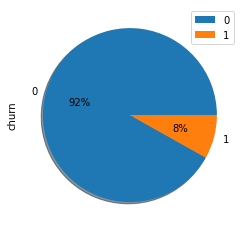

In [45]:
high_val_cust['churn'].value_counts().plot.pie(autopct = "%1.0f%%",legend = True,shadow=True,)

#### arpu (Average Revenue per user)

Text(0.5, 1.0, 'Non-Churn')

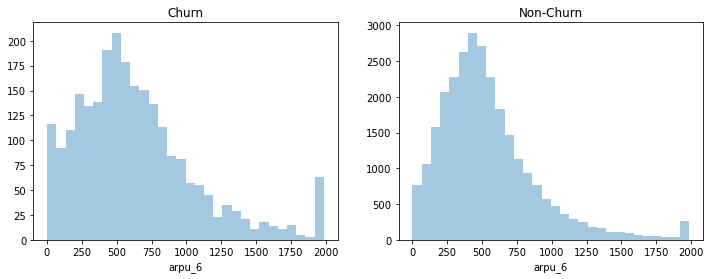

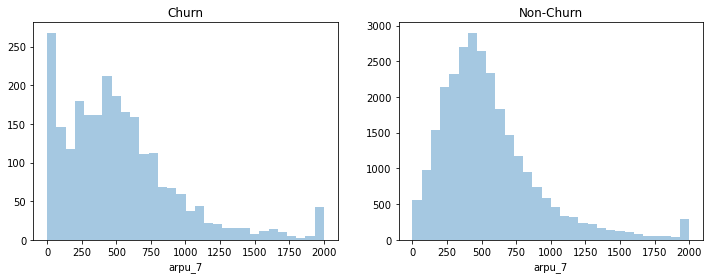

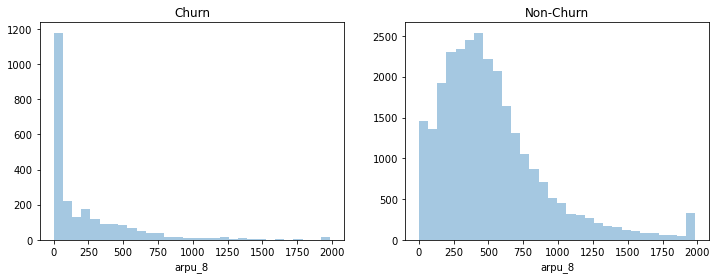

In [46]:
afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].arpu_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].arpu_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].arpu_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].arpu_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')


#### Offnet_mou (Calls outside of the operator network)

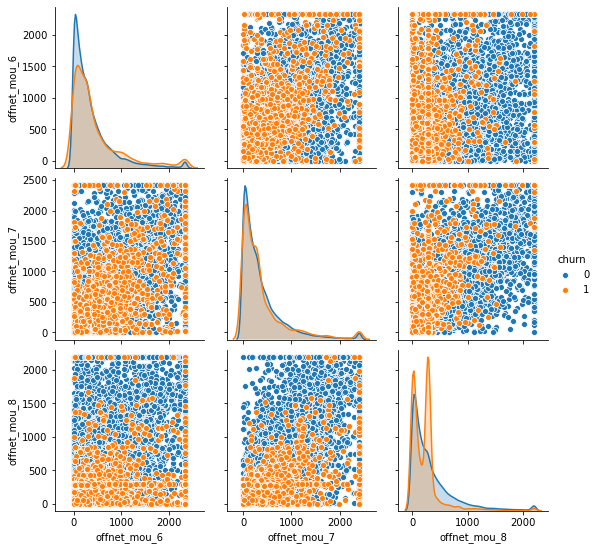

In [47]:
sns.pairplot(data=high_val_cust[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

####  Relationship btw total_ic_mou and total_og_mou ( Total incoming/outgoing minutes of usage ) 

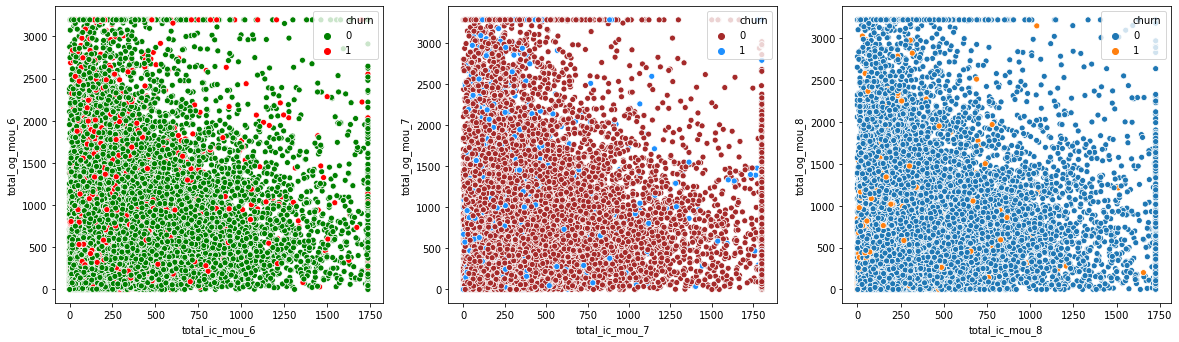

In [48]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(x = 'total_ic_mou_6', y = 'total_og_mou_6', hue='churn', data = high_val_cust, palette=['green','red'])
plt.subplot(2,3,2)
sns.scatterplot(x = 'total_ic_mou_7', y = 'total_og_mou_7', hue='churn',data = high_val_cust, palette=['brown','dodgerblue'])
plt.subplot(2,3,3)
sns.scatterplot(x = 'total_ic_mou_8', y = 'total_og_mou_8',hue='churn',  data=high_val_cust)


#### rech_amt_6 (Recharge amount : derived feature -> total data recharge + total call recharge)

Text(0.5, 1.0, 'Non-Churn')

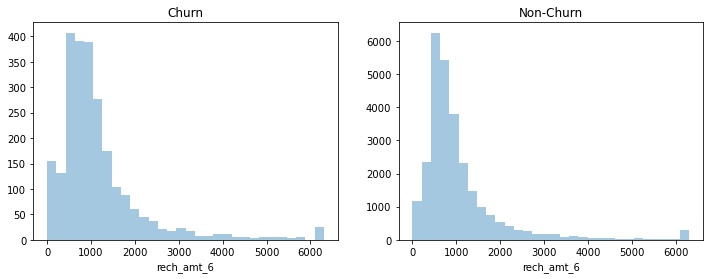

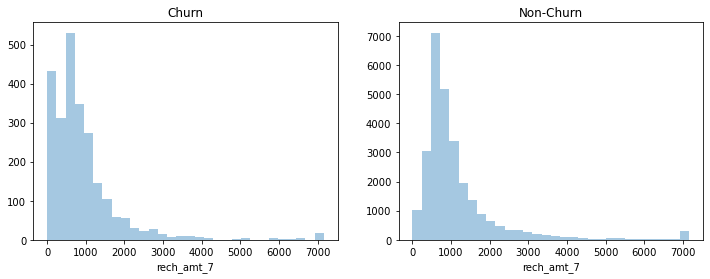

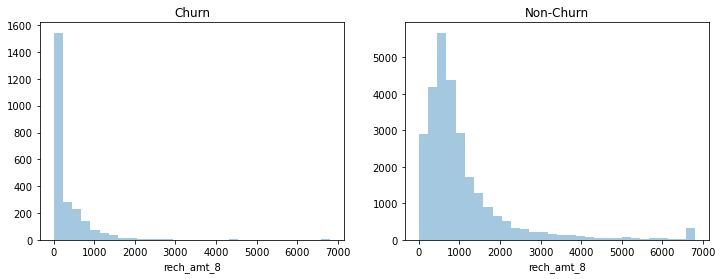

In [49]:
afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].rech_amt_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].rech_amt_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].rech_amt_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].rech_amt_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')


#### Heatmap/Correlation Table

Due to presence of so many variables Heatmap/Pairplot on entire data will not make sense . Lets try Correlation table

In [51]:
corr=high_val_cust.corr()
corr

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_amt_6,rech_amt_7,rech_amt_8,rech_amt_6n7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,max_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_amt
arpu_6,1.000000,0.595966,0.506669,0.431316,0.273080,0.232226,0.594117,0.395115,0.353878,0.142887,0.124349,0.137105,0.202225,0.158056,0.162402,0.273361,0.205435,1.741448e-01,0.411659,0.320189,0.293730,0.193699,0.162082,0.154912,0.016923,0.006762,0.016135,0.431819,0.333908,0.297283,0.326788,0.194357,0.165275,0.363447,0.225050,0.191415,0.095202,0.075462,0.072286,0.466857,0.282030,0.234508,0.138065,0.040716,0.001162,0.053912,0.061054,0.063117,0.147828,-0.016043,0.014261,0.665922,0.433313,0.364593,0.187288,0.137789,0.119272,0.251813,0.205405,0.180276,0.081976,0.072155,0.066357,0.256037,0.201849,0.176667,0.202398,0.127405,0.102741,0.180331,0.123108,0.116520,0.035588,0.051161,0.048119,0.211691,0.143279,0.128099,0.300707,0.224437,0.196336,0.115000,0.019136,-0.011439,0.106587,0.071753,0.068519,0.065895,0.045172,0.047971,0.415430,0.155478,0.132178,0.938769,0.568259,0.491192,0.337304,0.224775,0.255371,0.268782,0.173486,0.191740,0.055125,-0.051490,0.005533,-0.095570,-0.145958,-0.115344,0.133609,0.043408,0.060161,-0.135393,-0.232175,-0.146151,-0.044651,-0.100762,-0.072346,-0.207201,-0.255164,-0.200036,0.180304,0.072470,0.106939,-0.031453,-0.068474,-0.051900,-0.149253,-0.246142,-0.167364,0.057704,0.047694,4.792669e-02,0.110846,0.045242,0.023809,-0.095241,-0.045856,0.457042,0.154785,0.180590,0.341688,-0.309766,-0.201837,-0.251903,-0.017917,-0.058493,-0.180691,-0.235160,-0.089242,-0.001115,-0.274609,-0.099778,-0.087576,-0.038782,-0.068352,-0.117672,-0.215491,-0.275200,-0.049840,0.000773,0.022882,-0.033706,-0.115760
arpu_7,0.595966,1.000000,0.696617,0.279965,0.424587,0.364215,0.408428,0.5788

### Dummy variables

In [52]:
# Let's drop the first column 

dummy = pd.get_dummies(high_val_cust[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8']])
dummy = dummy.drop(['night_pck_user_6', 'fb_user_6'], 1)

In [53]:
high_val_cust = high_val_cust.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'], 1)

In [54]:
# Add the results to the master dataframe
high_val_cust = pd.concat([high_val_cust, dummy], axis=1)

In [55]:
high_val_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_amt_6,rech_amt_7,rech_amt_8,rech_amt_6n7,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,max_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_amt,night_pck_user_7,night_pck_user_8,fb_user_7,fb_user_8
0,197.385,214.816,213.803,-210.462746,-181.592666,0.00,291.977792,290.805235,0.00,34.863782,13.119922,0.00,35.771181,10.573357,0.00,-194.148691,-235.214545,0.00,169.434075,166.467539,0.00,6.165841,6.522176,0.00,13.950574,-0.05171,0.00,-18.693668,-62.169215,0.00,59.096936,65.206583,0.00,183.0168,191.29133,0.00,1.77529,1.673378,0.00,244.170688,258.572883,0.00,-286.567525,-204.070336,0.00,60.585963,7.346558,0.00,0.744389,0.508242,0.0,0.00,0.00,0.00,-79.875438,-91.45273,0.16,153.618029,154.649343,4.13,15.343184,16.347556,1.15,89.033373,79.502713,5.44,-41.186441,-42.233303,0.00,18.508565,31.588275,0.00,15.400811,4.397182,0.00,-7.243536,-6.197199,0.00,0.00,0.00,5.44,-92.76419,-85.546954,0.0,10.495207,8.234912,0.00,1.256183,4.260706,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,7.7025,196.55586,-291.391513,-23.991852,-23.172269,40.538916,-251.371786,102.459487,-33.96626,0.000,-78.828043,6.763259,-9.365059,42.735637,5.440,-1.5,-55.0,0.0,0.0,-9.975,-7.555,-55.0,0.0,0.0,1.0,1.0
1,1069.180,1349.850,1986.622,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.00000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.8900,31.76000,49.14,6.66000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.

## Model Building

We will be having 2 kinds of model:
* Interpretable Model
* Non-Interpretable Model ( with PCA )

For non-Interpretable models , we are passing train and test data post SMOTE, RFE (163 -> 120 ) and PCA(120 -> 60) 


### Splitting Data into Training and Test Sets

In [56]:
# change churn to numeric
high_val_cust['churn'] = pd.to_numeric(high_val_cust['churn'])

In [57]:
# divide data into train and test
X = high_val_cust.drop("churn", axis = 1)
y = high_val_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4,stratify = y)
# print shapes of train and test sets
X_train.shape

(21000, 161)

In [58]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'total_rech_amt_diff', 'max_rech_amt_diff', 'max_rech_data_diff',
       'vol_2g_mb_diff', 'vol_3g_mb_diff', 'total_rech_data_amt',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_7', 'fb_user_8'],
      dtype='object', length=161)

### Scaling Data

In [59]:
#perform minmax scaling before PCA

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [60]:
# fit transform the scaler on train
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
# transform test using the already fit scaler
X_test[num_vars] = scaler.transform(X_test[num_vars])

### SMOTE

In [61]:
#SMOTE to correct class imbalance
# As discussed earlier, given dataset is skewed, lets balance the dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)

print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

#Now we have balanced dataset

Dimension of X_tr Shape: (38582, 161)
Dimension of y_tr Shape: (38582,)
Imbalance in Training dataset: 1.0


### RFE to eliminate some features 

In [62]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.feature_selection import RFE

# lets RFE select 150 most imp features for us
rfe = RFE(lr, 150)   
rfe = rfe.fit(X_tr, y_tr)

In [63]:
X_train_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]

In [64]:
X_test_rfe=X_test[X_train_rfe.columns]

In [65]:
X_test.shape

(9001, 161)

### PCA to reduce dimensionality further 

In [66]:
#lets perform PCA on sampled data. import PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [67]:
#lets fit PCA on the train dataset
pca.fit(X_train_rfe)
pca.explained_variance_ratio_

array([3.29889641e-01, 1.14999832e-01, 6.73983705e-02, 5.09504383e-02,
       4.77083200e-02, 3.59096142e-02, 3.01444438e-02, 2.39718089e-02,
       2.15521824e-02, 1.84028099e-02, 1.57974403e-02, 1.36911854e-02,
       1.24001165e-02, 1.02156123e-02, 9.48491294e-03, 9.24749391e-03,
       8.27942907e-03, 7.80709879e-03, 7.64561500e-03, 7.17138036e-03,
       6.41559445e-03, 6.25908842e-03, 5.97923342e-03, 5.75164488e-03,
       5.38623422e-03, 5.23543412e-03, 4.96607387e-03, 4.65565188e-03,
       4.63130776e-03, 4.48506400e-03, 4.01905149e-03, 3.89629145e-03,
       3.77977658e-03, 3.55255353e-03, 3.35005567e-03, 3.17094951e-03,
       2.98477464e-03, 2.91741469e-03, 2.86419215e-03, 2.65105995e-03,
       2.62956430e-03, 2.54075538e-03, 2.46539665e-03, 2.31341454e-03,
       2.26147400e-03, 2.22490901e-03, 2.18854256e-03, 2.07094338e-03,
       2.00575836e-03, 1.94465137e-03, 1.84974543e-03, 1.84392966e-03,
       1.80185778e-03, 1.75758217e-03, 1.66465417e-03, 1.64679438e-03,
      

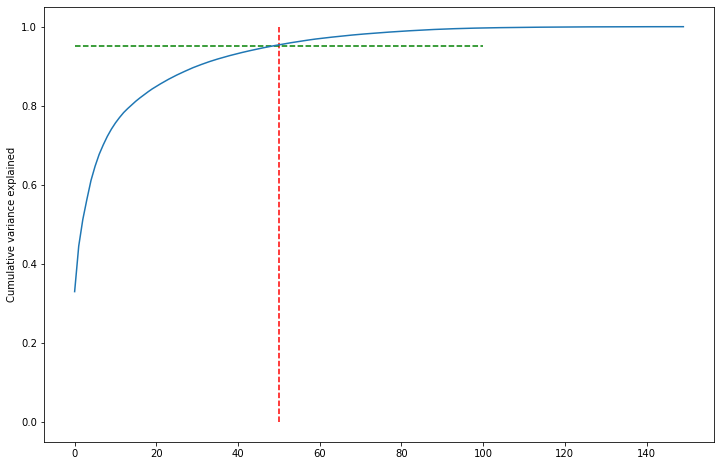

In [68]:
#lets draw screeplot in between cumulative variance and number of components
%matplotlib inline

fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained")
plt.show()

**approx 50 components explain  more than 95% variance**

So we will go with 50 componenets 

In [69]:
#lets perform incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=50)

In [70]:
#fit
X_train_pca = pca_again.fit_transform(X_train_rfe)
X_train_pca.shape

(38582, 50)

In [71]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.006768557043122105 , min corr:  -0.010014482415725343


As we can see correlations are close to 0. So no multicollinearity btw these components 

In [72]:
#Applying selected components to the test data - 45 components
X_test_pca = pca_again.transform(X_test_rfe)


In [73]:
X_test_pca.shape

(9001, 50)

In [74]:
X_train_pca.shape

(38582, 50)

##### This gives us an idea about the no of component we should choose for PCA

## Non-Interpretable Models

## MODEL 1 - Regularized Logistic Regression with PCA 

In [75]:
learner_pca = LogisticRegression()

model_pca = learner_pca.fit(X_train_pca, y_tr)

In [76]:
# predict churn on test data
pred_probs_test = model_pca.predict_proba(X_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))


'0.91'

Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.

### Hyperparameter tuning - Regularized Logistic Regression with PCA

AS , we have already taken care of imbalance /skewness using SMOTE , we need not to use weight parameter here

In [77]:
# PCA
pca = PCA()

logistic = LogisticRegression( )

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic),
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [40,60], 'logistic__C': [0.001, 0.01,0.1, 0.5, 1, 2, 3, 4, 5, 10,100], 'logistic__penalty': ['l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [78]:
model.fit(X_train_rfe, y_tr)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   51.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5,
                                         10, 100],
                         'logistic__penalty': ['l2'],
                         'pca__n_components': [40, 60]},
             scoring='recall', verbose=1)

In [79]:
# cross validation results
pd.DataFrame(model.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.597411,0.283228,0.057350,0.012708,0.001,l2,40,"{'logistic__C': 0.001, 'logistic__penalty': 'l...",0.813116,0.794247,0.792639,0.802748,0.799378,0.800425,0.007298,22
1,3.422532,0.254389,0.068381,0.005750,0.001,l2,60,"{'logistic__C': 0.001, 'logistic__penalty': 'l...",0.813634,0.795543,0.793157,0.803784,0.801970,0.801618,0.007179,21
2,2.562694,0.084738,0.056674,0.014343,0.01,l2,40,"{'logistic__C': 0.01, 'logistic__penalty': 'l2...",0.828149,0.809277,0.807672,0.818559,0.813375,0.815406,0.007400,20
3,3.818870,0.539935,0.067591,0.014781,0.01,l2,60,"{'logistic__C': 0.01, 'logistic__penalty': 'l2...",0.834370,0.814719,0.814412,0.828409,0.820373,0.822456,0.007827,19
4,2.992646,0.507632,0.057154,0.009382,0.1,l2,40,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.835666,0.820938,0.821151,0.833852,0.826853,0.827692,0.006175,18


In [80]:
# print best hyperparameters
print("Score: ", model.scorer_)
print("Best hyperparameters: ", model.best_params_)

Score:  make_scorer(recall_score, average=binary)
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [81]:
# hyperparameter space
params = {'logistic__C':[3], 'logistic__penalty': ['l2'],'pca__n_components': [60]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [82]:
model.fit(X_train_rfe, y_tr)
# predict churn on test data
y_pred = model.predict(X_test_rfe)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


[[6983 1286]
 [ 117  615]]


In [83]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.84
Specificity: 	0.84


In [84]:
# check area under curve
y_pred_prob = model.predict_proba(X_test_rfe)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.91


### So this model is giving us 84% Sensitivity 

## MODEL 2 - Decision Tress with PCA

Here we are using the 60 Prinicipal component we got from PCA above which are balanced already ( used SMOTE)

In [85]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_train_pca, y_tr)

DecisionTreeClassifier(max_depth=5)

In [86]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
#X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test_pca)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8269
           1       0.29      0.73      0.41       732

    accuracy                           0.83      9001
   macro avg       0.63      0.79      0.66      9001
weighted avg       0.92      0.83      0.86      9001



This is the basic model now lets try to optimize the hyperparameter using GridsearchCv

#### Hyperparameter Tuning

In [124]:

parameters = { 'max_depth': [5, 10, 15],
    'min_samples_leaf': [10, 20, 50],
    'min_samples_split': [10,50,100],}


# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# create 5 folds

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=folds, 
                   scoring="recall")

tree.fit(X_train_pca,y_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [10, 50, 100]},
             scoring='recall')

In [125]:
score_df = pd.DataFrame(tree.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.738702,0.079872,0.009291,0.004455,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.789891,0.778262,0.794246,0.787466,0.006747,19
1,0.753597,0.051119,0.005317,0.003759,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.789891,0.778262,0.794246,0.787466,0.006747,19
2,0.670482,0.011755,0.004674,0.003404,5,10,100,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.789891,0.778262,0.794246,0.787466,0.006747,19
3,0.783383,0.031049,0.011526,0.003543,5,20,10,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.789425,0.778573,0.794246,0.787414,0.006555,22
4,0.773210,0.051334,0.005318,0.003847,5,20,50,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.789425,0.778573,0.794246,0.787414,0.006555,22


In [126]:
print(tree.best_estimator_)
print(tree.best_params_)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=10,
                       random_state=100)
{'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10}


Over-Predict a Label than Under-Predict: This  technique is very affecting to improve minority class performance. In brief, the technique is to penalize the model most if it misclassified class-1, a little less for class-0 

In [91]:
# parameters to build the model on
parameters = { 'max_depth': [10], 'criterion': ["entropy"],'min_samples_leaf': [10],'min_samples_split':[50]}

dtree = DecisionTreeClassifier(random_state = 100,class_weight= {0:0.1, 1: 0.9})
# fit tree on training data
tree = GridSearchCV(estimator=dtree,
                    param_grid=parameters, 
                    cv=folds, 
                    scoring="recall")

tree.fit(X_train_pca, y_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9},
                                              random_state=100),
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'min_samples_leaf': [10], 'min_samples_split': [50]},
             scoring='recall')

In [92]:

# predict churn on test data
y_pred = tree.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4458 3811]
 [ 111  621]]


In [93]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = tree.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.85
Specificity: 	0.54
AUC:    	 0.83


### So this model is giving us 85% Sensitivity

##### Let us now , lets try Ensemble of  multitude of decision trees  with Bagging called Random Forest

## MODEL 3 -  Random Forest with PCA

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier() 
model_rf.fit(X_train_pca, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test_pca)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9217864681702033


In [95]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8269
           1       0.52      0.55      0.53       732

    accuracy                           0.92      9001
   macro avg       0.74      0.75      0.74      9001
weighted avg       0.92      0.92      0.92      9001



In [96]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10,15],
    'min_samples_leaf': [10, 20, 50,70],
    'min_samples_split': [50, 100,150,200],
}
# Create a based model
rf = RandomForestClassifier()
# specify number of folds for k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1)

In [97]:
# fit the grid search with the data
grid_search.fit(X_train_pca, y_tr)
# optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  7.0min finished


0.8955990234782569 {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 50}


In [117]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15],
    'min_samples_leaf':[10],
    'min_samples_split':[50],
    'n_estimators':[500]
}

rf = RandomForestClassifier(class_weight= {0:0.2, 1: 0.8})

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1)
# Make predictions
grid_search.fit(X_train_pca, y_tr)



Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}),
             n_jobs=-1,
             param_grid={'max_depth': [15], 'min_samples_leaf': [10],
                         'min_samples_split': [50], 'n_estimators': [500]},
             verbose=1)

In [118]:
# predict churn on test data
y_pred = grid_search.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6350 1919]
 [ 124  608]]


In [119]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = grid_search.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.83
Specificity: 	0.77
AUC:    	 0.88


### So this model is giving us 83% Sensitivity 

## Interpretable Model 

## MODEL 4 :  RFE-Random Forest

### RFE to reduce the features

In [104]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.feature_selection import RFE

# lets RFE select 15 most imp features for us
rfe = RFE(lr, 100)   
rfe = rfe.fit(X_train, y_train)

In [105]:
X_tr_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
X_ts_rfe=X_test[X_tr_rfe.columns]

### Random Forest

In [120]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_tr_rfe.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)


10


In [121]:
# fit model
rf_model.fit(X_tr_rfe, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.4s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=10,
                       oob_score=True, random_state=4, verbose=1)

In [122]:
# OOB score
rf_model.oob_score_

0.9439047619047619

In [123]:
# predict churn on test data
y_pred = rf_model.predict(X_ts_rfe)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_ts_rfe)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8170   99]
 [ 392  340]]
Sensitivity: 	0.46
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [127]:
metrics.accuracy_score(y_test, y_pred)

0.9454505054993889

**As we are using this model to get top Features that has most impact on churn and non-churn so we are not much bothered about model Sensitivity but overall accuracy .**

In [110]:
# predictors
features =X_tr_rfe.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,6.578730
1,rech_amt_8,5.658974
2,roam_og_mou_8,4.197880
3,loc_ic_t2t_mou_8,4.100717
4,total_og_mou_8,3.998788
5,max_rech_amt_8,2.790635
6,last_day_rch_amt_8,2.710053
7,total_rech_amt_diff,2.520327
8,loc_ic_mou_8,2.467720
9,loc_ic_t2m_mou_8,2.419681


In [111]:
# extract top 'n' features
top_n = 10
top_features = feature_importance.variables[0:top_n]

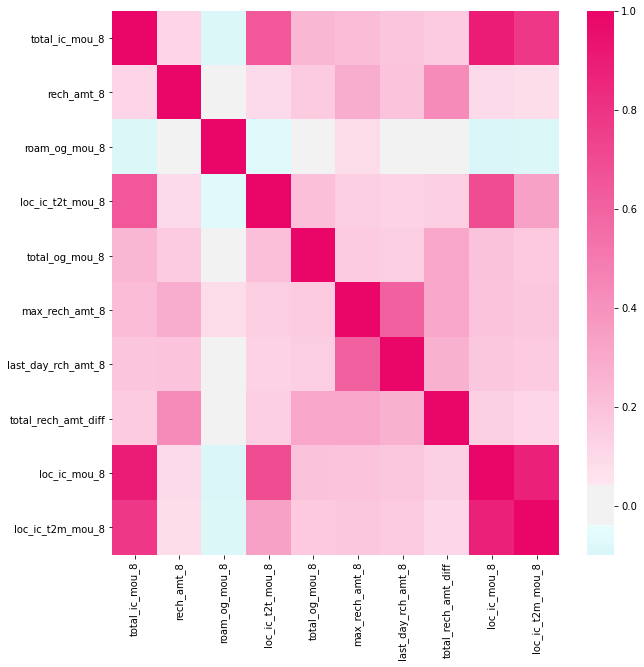

In [112]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_tr_rfe[top_features].corr(), center=0.0, cmap=mycmap)

### Driver Variables of Churn and Churn Analysis & Recommendation

1.  total_ic_mou_8	( Total incoming call in 8th Month)
2.	rech_amt_8	(Recharge amount in 8th Month , it is a derived feature -> total data recharge + total call recharge)
3.	roam_og_mou_8	( Roaming Outgoing in 8th MOnth)
4.	loc_ic_t2t_mou_8 ( Local incoming within same operator in 8th Month)
5.	total_og_mou_8	( Totaloutgoing call in 8th Month)
6.	max_rech_amt_8	 ( Maximum Recharge amount in 8th Month)
7.	last_day_rch_amt_8	 ( Last day reach amount in 8th Month)
8.	total_rech_amt_diff	 ( total diff in recharge amount , it is a derived feature -> total_rech 8-(total_rech 6+total_rech 7))
9.	loc_ic_mou_8	( Local incoming call in 8th month)
10.	loc_ic_t2m_mou_8	(Local incoming call to other operator mobile in 8th month)


##### Conclusion -

* Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
* Recharge amount difference btw month 8 and (6,7) for data and call  of Churn.
* Max Recharge Amount is a strong feature to predict churn.

Non-Interpretable Model :

* MODEL 1 - Regularized Logistic Regression with PCA ( Sensitivity 84% )
* MODEL 2 - Decision Tress with PCA ( Sensitivity 85% )
* MODEL 3 - Random Forest with PCA ( Sensitivity 83% )

Interpretable Model :

* MODEL 4 : RFE-Random Forest ( accuracy -94 % , ROC -93% )